In [ ]:
# Importing Required Libraries for the assignment
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
import git as git

In [ ]:
!git clone https://github.com/Kasper-Raupach-Haurum/M4-Deep-learning-portfolio.git

Cloning into 'M4-Deep-learning-portfolio'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 7.12 MiB | 9.74 MiB/s, done.


In [ ]:
data = pd.read_csv('/content/M4-Deep-learning-portfolio/general_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
data1 = data.dropna()

In [ ]:
data1.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
data2 = data1.drop(['Education', "BusinessTravel", "Department", "EducationField", "JobRole", "Gender", "MaritalStatus", "NumCompaniesWorked", "Over18", "PercentSalaryHike", "StockOptionLevel", "DistanceFromHome", "StandardHours", "TrainingTimesLastYear", "EmployeeCount", "YearsSinceLastPromotion", "YearsWithCurrManager", "EmployeeID", "JobLevel"], axis=1)

In [ ]:
data2.head()

,Age,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany
0,51,0,131160,1.0,1
1,31,1,41890,6.0,5
2,32,0,193280,5.0,5
3,38,0,83210,13.0,8
4,32,0,23420,9.0,6


In [ ]:
data2.select_dtypes('int64' ,'float64').columns

Index(['Age', 'Attrition', 'MonthlyIncome', 'YearsAtCompany'], dtype='object')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4382 non-null   int64  
 1   Attrition          4382 non-null   int64  
 2   MonthlyIncome      4382 non-null   int64  
 3   TotalWorkingYears  4382 non-null   float64
 4   YearsAtCompany     4382 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 334.4 KB


In [ ]:
data2['Age'] = data2['Age'].astype(float)
data2['Attrition'] = data2['Attrition'].astype(float)
data2['MonthlyIncome'] = data2['MonthlyIncome'].astype(float)
data2['YearsAtCompany'] = data2['YearsAtCompany'].astype(float)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4382 non-null   float64
 1   Attrition          4382 non-null   float64
 2   MonthlyIncome      4382 non-null   float64
 3   TotalWorkingYears  4382 non-null   float64
 4   YearsAtCompany     4382 non-null   float64
dtypes: float64(5)
memory usage: 334.4 KB


In [ ]:
# Scaling
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data2[['MonthlyIncome', 'TotalWorkingYears']])
data_s = pd.DataFrame(data_scaled, columns=['MonthlyIncome', 'TotalWorkingYears'])

In [ ]:
data_s.head()

,MonthlyIncome,TotalWorkingYears
0,0.637546,0.025
1,0.167457,0.150
2,0.964666,0.125
3,0.385045,0.325
4,0.070195,0.225


In [ ]:
data_s_all = pd.concat([data2[['Age', 'Attrition', 'YearsAtCompany']], data_s], axis=1)
data_s_all

,Age,Attrition,YearsAtCompany,MonthlyIncome,TotalWorkingYears
0,51.0,0.0,1.0,0.637546,0.025
1,31.0,1.0,5.0,0.167457,0.150
2,32.0,0.0,5.0,0.964666,0.125
3,38.0,0.0,8.0,0.385045,0.325
4,32.0,0.0,6.0,0.070195,0.225
...,...,...,...,...,...
4404,29.0,0.0,6.0,NaN,NaN
4405,42.0,0.0,3.0,NaN,NaN
4406,29.0,0.0,3.0,NaN,NaN
4407,25.0,0.0,4.0,NaN,NaN


In [ ]:
data_s_all.isnull().sum()

Age                  26
Attrition            26
YearsAtCompany       26
MonthlyIncome        26
TotalWorkingYears    26
dtype: int64

In [ ]:
data_s_all = data_s_all.dropna()

In [ ]:
data_s_all.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
data_x = torch.tensor(data_s_all[['Age', 'YearsAtCompany']].values.astype(np.float32))
data_y = torch.tensor(data_s_all[['Attrition']].values.astype(np.float32))

In [ ]:
print(data_x.size())
print(data_y.size())

torch.Size([4382, 2])
torch.Size([4382, 1])


In this first training of the ANN network, we will be selecting a single neuron and 2 inputs to see if it can function, before we head fowards with selecting 2 hidden layers

In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net1 = torch.nn.Sequential(torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid());
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net1.parameters(), lr=learning_rate)

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net1.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-84-27edbc55cf72>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.1340041607618332
Loss: 0.12768711149692535
Loss: 0.1276381015777588
Loss: 0.12760335206985474
Loss: 0.12757202982902527
Loss: 0.12754426896572113
Loss: 0.12751983106136322
Loss: 0.12749828398227692
Loss: 0.12747928500175476
Loss: 0.12746255099773407


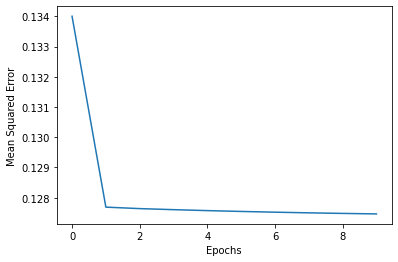

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

As seen above, it did indeed work out, so we shall proceed to making a ANN network with 2 inputs and 1 hidden layer:

In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net2 = torch.nn.Sequential(torch.nn.Linear(2,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net2.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net2.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-93-a2c277292e44>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.13173110783100128
Loss: 0.12769091129302979
Loss: 0.12740960717201233
Loss: 0.12726420164108276
Loss: 0.12718157470226288
Loss: 0.12712785601615906
Loss: 0.1270882934331894
Loss: 0.1270565390586853
Loss: 0.12702985107898712
Loss: 0.1270068883895874


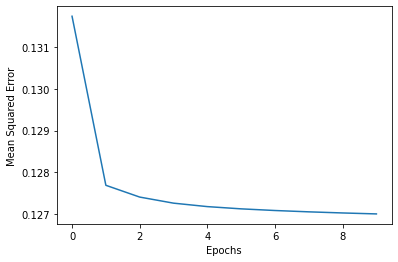

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

As seen above, it would seem the epochs could be extended, as well as a higher learning rate due to the exponential lowering of the mean squared error, can could perhaps be lowered even further if we were to add in additional epochs, and to set a higher learning rate to do the isocratic gradient lowering.

In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 50
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net3 = torch.nn.Sequential(torch.nn.Linear(2,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-95-93e7fc3de979>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.14013950526714325
Loss: 0.13120464980602264
Loss: 0.13107497990131378
Loss: 0.13094155490398407
Loss: 0.13078263401985168
Loss: 0.13060900568962097
Loss: 0.13045616447925568
Loss: 0.130387544631958
Loss: 0.1303856372833252
Loss: 0.1303497850894928
Loss: 0.13032539188861847
Loss: 0.1303454339504242
Loss: 0.13034075498580933
Loss: 0.1303071826696396
Loss: 0.13030922412872314
Loss: 0.13032126426696777
Loss: 0.13029523193836212
Loss: 0.13031072914600372
Loss: 0.1302700787782669
Loss: 0.13026311993598938
Loss: 0.13029281795024872
Loss: 0.13031063973903656
Loss: 0.13033631443977356
Loss: 0.13031955063343048
Loss: 0.13031934201717377
Loss: 0.1303214132785797
Loss: 0.13032743334770203
Loss: 0.13035231828689575
Loss: 0.1303575485944748
Loss: 0.1303585022687912
Loss: 0.13035954535007477
Loss: 0.13036097586154938
Loss: 0.13036608695983887
Loss: 0.13036715984344482
Loss: 0.13036847114562988
Loss: 0.1303311288356781
Loss: 0.13032950460910797
Loss: 0.13033011555671692
Loss: 0.130331099033355

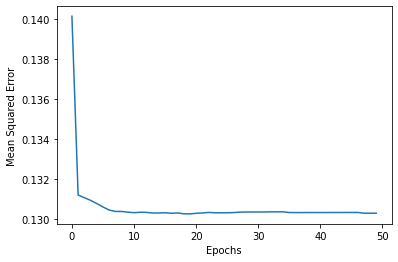

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

Afterwards we will now move onto making ANN network composed of 2 hidden layers and 2 inputs, which will be done below:


In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(2,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 50
learning_rate = 0.01
loss_set = {}



for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

<ipython-input-105-3d0b4a80e3a5>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.1337754726409912
Loss: 0.12995487451553345
Loss: 0.12973101437091827
Loss: 0.12961189448833466
Loss: 0.1294526904821396


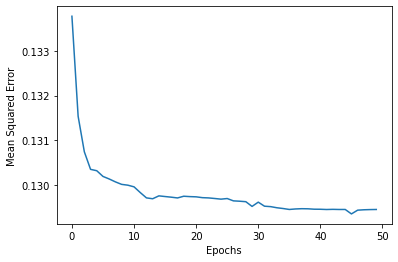

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

For the last ANN network test, we will run it by adding an additional 50 epochs to see if it is possible to get a even lower MSE score by extending the epoch runs the training loop goes by:

In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(2,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 100
learning_rate = 0.01
loss_set = {}

for epoch in range(100):
    y = model_net5(data_x)
    # 2. FeedForward Evaluation
    loss = loss_mse(y,data_y)
    optimizer.zero_grad()
    # 3. Backward / Gradient Calculation
    loss.backward()
    # 4. Back Propagation
    optimizer.step()

    loss_set[epoch] = loss.detach().numpy()
    #display_loss
    print('epoch = ',epoch, ',' , 'loss = ',loss.item())

epoch =  0 , loss =  0.2243424654006958
epoch =  1 , loss =  0.15849649906158447
epoch =  2 , loss =  0.14002138376235962
epoch =  3 , loss =  0.5602336525917053
epoch =  4 , loss =  0.15915542840957642
epoch =  5 , loss =  0.15904651582241058
epoch =  6 , loss =  0.15892328321933746
epoch =  7 , loss =  0.1587827205657959
epoch =  8 , loss =  0.15862193703651428
epoch =  9 , loss =  0.1584378033876419
epoch =  10 , loss =  0.15822412073612213
epoch =  11 , loss =  0.1579737365245819
epoch =  12 , loss =  0.15767568349838257
epoch =  13 , loss =  0.1573152244091034
epoch =  14 , loss =  0.15687216818332672
epoch =  15 , loss =  0.15631751716136932
epoch =  16 , loss =  0.15560606122016907
epoch =  17 , loss =  0.1546686440706253
epoch =  18 , loss =  0.15339165925979614
epoch =  19 , loss =  0.15158145129680634
epoch =  20 , loss =  0.14889632165431976
epoch =  21 , loss =  0.14474770426750183
epoch =  22 , loss =  0.13833092153072357
epoch =  23 , loss =  0.13024674355983734
epoch =  

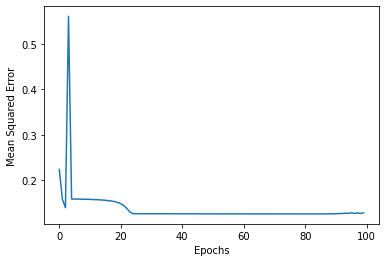

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# Now lets save our trained model
# save the trained model
torch.save(model_net5, 'model_net5.pkl')

In [ ]:
#   Lets load the model for inference

model = torch.load('model_net5.pkl')
model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)